In [1]:
!pip -qq install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
try:
    from probml_utils import savefig, latexify, is_latexify_enabled
except ModuleNotFoundError:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify, is_latexify_enabled

!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/probml/probml-utils.git to /tmp/pip-req-build-b9gapk8j
  Running command git clone --filter=blob:none --quiet https://github.com/probml/probml-utils.git /tmp/pip-req-build-b9gapk8j
  Resolved https://github.com/probml/probml-utils.git to commit 536534e37cf8b03948e7ac5a5b5d8e62ef62057c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 KB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 11.2 MB/s eta 0:00:00
     

In [3]:
%env FIG_DIR = latexed
%env LATEXIFY=1

env: FIG_DIR=latexed
env: LATEXIFY=1


In [4]:
latexify(fig_width = 6, fig_height = 2)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib.colors import hex2color as h2c
import umap

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
X= np.load("FVC_FEATURES_60.npy")
Y= np.load("FVC_LABELS_60.npy")

In [8]:
X= np.delete(X,[23,55,4,9,52,44,45,33,43,20,1,50], axis=0)
Y= np.delete(Y,[23,55,4,9,52,44,45,33,43,20,1,50], axis=0)

In [9]:
# FVC
Best_train_fvc = [20, 40, 45, 31, 34, 2, 39, 4]
Best_test_fvc = [17, 21, 16, 7, 30, 8, 41, 32, 12, 25]
Best_query_fvc = [i for i in range(0,48) if i not in Best_train_fvc + Best_test_fvc]

Avg_train_fvc = [30, 47, 15, 29, 35, 9, 24, 12] 
Avg_test_fvc = [45, 39, 8, 4, 20, 32, 25, 46, 42, 41]
Avg_query_fvc = [i for i in range(0,48) if i not in Avg_train_fvc + Avg_test_fvc]


Worst_train_fvc = [3, 0, 13, 19, 45, 8, 16, 18]
Worst_test_fvc = [27, 10, 1, 38, 34, 15, 11, 31, 21, 23]
Worst_query_fvc = [i for i in range(0,48) if i not in Worst_train_fvc + Worst_test_fvc]

In [10]:
import seaborn as sns

In [11]:
def grid_generate(X, seed, Best_train, Best_test, Avg_train, Avg_test, Worst_train, Worst_test, main_title):

  umap_data = umap.UMAP(n_neighbors=45,min_dist=0.7,n_components=2,random_state=seed).fit_transform(X)
  data = umap_data

  fig, axs = plt.subplots(1, 3, tight_layout=True)
  for j in range(3):      ## Iterating over the indices of X and if the index belongs to Best_train/test/query then assigning a corresponding color in the color array used for providing the label
      if j == 0:                                    
          values = [0 if index in Best_train else 1 if index in Best_test else 2 for index in range(len(X))]
      elif j == 1:
          values = [0 if index in Avg_train else 1 if index in Avg_test else 2 for index in range(len(X))]
      else:
          values = [0 if index in Worst_train else 1 if index in Worst_test else 2 for index in range(len(X))]
          
      classes = ['Train Set', 'Test Set', 'Pool Set']
      # Define the colors as hexadecimal values with alpha values
      colors_hex = [('#388e3c', 1), ('#9c27b0', 1), ('#ff9800', 0.5)]

      # Convert the hexadecimal values to RGBA values
      colors_rgba = [(h2c(c[0])[0], h2c(c[0])[1], h2c(c[0])[2], c[1]) for c in colors_hex]

      # Create the colormap with the RGBA values
      colors = ListedColormap(colors_rgba)
      scatter = axs[j].scatter(data[:,0], data[:,1],c=values, cmap = colors,s=20)
      axs[j].tick_params(left = False, right = False , labelleft = False , labelbottom = False, bottom = False)
    
      if(j==2):
        axs[j].legend(handles=scatter.legend_elements()[0], labels=classes,loc="center left", bbox_to_anchor=(1.05, 0.5))
      str_title= " Best Set" if j==0 else " Avg Set" if j==1 else " Worst Set"
      axs[j].set_xlabel(str_title)
  savefig("2D_grid.pdf")
  plt.show()

saving image to latexed/2D_grid_latexified.pdf
Figure size: [6. 2.]


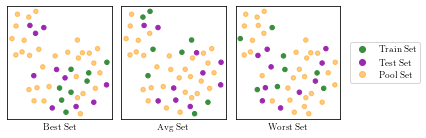

In [12]:
grid_generate(X, 42, Best_train_fvc, Best_test_fvc, Avg_train_fvc, Avg_test_fvc, Worst_train_fvc, Worst_test_fvc,"Comparison of Best, Avg, Worst set in 2-Dimension")